In [1]:
#import numpy as np
#from numpy.random import rand
#import csv
#import h5py
#import signal
#import fast5
#import fastq
#import re
#import matplotlib.pyplot as plt
#import tensorflow as tf
#from tensorflow import keras

In [2]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import re
import numpy as np

Using TensorFlow backend.


In [3]:
#import tensorflow as tf
#with tf.device('/gpu:0'):
#    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
#    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
#    c = tf.matmul(a, b)
#with tf.Session() as sess:
#   print (sess.run(c))

In [4]:
"""
this function divides the length of whatever 
size the list is by 4 for a 4mer
"""
def BaseFunction(x,y): 
    return((len(x)//y),y)

In [5]:
"""
this function divides the length of whatever 
size the list is by 40 for a 40mer
"""
def SigFunction(x,y): 
    return((y),((x//y)))

In [6]:
"""
this function provides information about the array    
"""
def array_inspect(x):
    print ("Shape is",(x.shape))
    print(("Length is",len(x)))
    print(("Dimension is",x.ndim))
    print(("Total Size is",x.size))
    print(("Type is",x.dtype))
    print(("Type Name is",x.dtype.name))

In [7]:
"""
this function normalizes the raw signal resistances
from each read by dividing by the mean(or std?)
"""
def normalize(x,y):
    z=np.divide(x,y)
    #np.savetxt("NormalizedSigArray_{}.csv".format(),(z), delimiter=",")
    return z

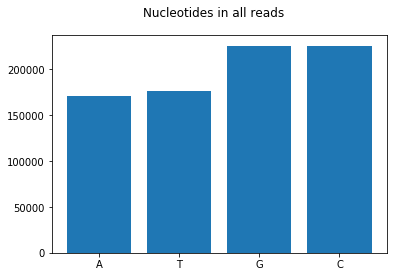

In [8]:
"""
This cell does the following
    1)Imports the bases
    2)trims off the new lines and digits
    3)converts them to a list
    4)converts them to a code of 0123 instead of ATCG
"""
f = open("fasta/sampled_read.fasta","r") #opens the file with the reads
a = f.read()
b = (a.split(">", 12))
base = [re.sub(">|\n|\d", "",str) for str in b]
baseA0 = [re.sub("A","0",str) for str in base]
baseT1 = [re.sub("T","1",str) for str in baseA0]
baseG2 = [re.sub("C","2",str) for str in baseT1]
base_coded = [re.sub("G","3",str) for str in baseG2] 
A0=(a.count("A")) 
T1=(a.count("T"))
G2=(a.count("G"))
C3=(a.count("C"))
names = ['A', 'T', 'G', 'C']
values = [(A0), (T1), (G2), (C3)]
plt.subplot()
plt.bar(names, values)
plt.suptitle('Nucleotides in all reads')
plt.show()

In [9]:
"""
The purpose of this code is the following
1)Convert the coded reads to integer form 
2)Create an array inside the array with each read as a row
3)Create a 2D matric with the counts of all the possible scenarios 
presented in each row and the reads in each column
4)Create a 1D array with the readlengths
"""
kmer=[]
kmercount=[]
reads=[]
#readstring={}
readslength=[]
res=(len(base_coded))   
for x in range(res):
    l=list(int (i) for i in base_coded[x])
    for y in range(1):
        i=(l.count(y), l.count(y+1), l.count(y+2), l.count(y+3))
        kmercount.append(i)
        n=np.transpose(kmercount) # creates a 2D matrix with the bases counts as rows(ATGC) and the reads by columns
        kmer = n.view() #Create a view of the array with the same data
    d=np.asarray(l)
    d.resize((BaseFunction(d,6))) #Enter the list and the desired kmer for the function
    v=(str(d))
    reads.append(d) # store the reads in an array called reads
    c=len(d)
    readslength.append(c) #store the amt of kmer reads in readlength=

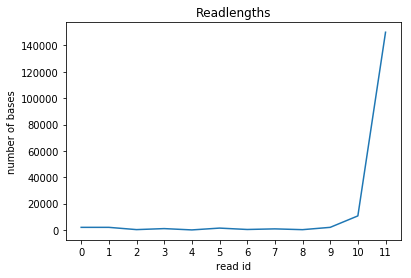

In [10]:
"""
The purpose of this code is the following
1) visualize the readlengths
"""
plt.ioff()
for i in range(1):
    plt.title("Readlengths")
    plt.ylabel('number of bases')
    plt.xlabel('read id')
    plt.plot(kmer[i])
    plt.xticks(np.arange(0, 12))
    plt.show()

In [16]:
"""
The cell does the following:
    1) Import the signal level data
    2) Normalize it to the mean fof the signal
    3) Appends the signal data from each read into a row of an array given the read count
"""
means = [] 
std = []
sig = []
for x in range(12):
    a=np.loadtxt("signal/signal_{}.txt".format(x)) # load the signal
    m=a.mean() #obtain the average signal from the read
    b=normalize(m,a) # divide each resistance by the average to normalize 
    c=b.size #obtains the number of resistance signals per read
    #print("resist",c)
    d=readslength[x] #obtains the kmers count per read
    #print("kmer",d)
    e=SigFunction(c,d) #figures out the average amount of resistances per kmer
    #print("Signal",x,"2D array size={}".format(e))
    b.resize(e) # Insert the (#bases,#sig) changes the signal level n signals wide
    sig.append(b)

In [40]:
"""
The goal for this cell is to convert the reads to string
index the unique outputs for the 4mers
and create a new list of the indexed [1:256 or whatever]
reads for the model
"""
arr2=[] # In this code I converted the reads to a concated string of a 4mer
converted=[]
converted2=[]
for i, v in enumerate(reads[11]): #Read 0 is the training data
    temp = ''
    for w in v:
        temp = temp + str(w)
    arr2.append(temp)
a=np.unique(arr2) # makes an array of every unique combo in the read for downstream indexing
for x in arr2:
    #print(x)
    b=enumerate(a)
    c=[(i) for i, j in b if a[i]==(x)]
    converted.append(c)
for i, v in enumerate(converted): #Read 0 is the training data
    temp = ''
    #print(v)
    for w in v:
        #print(w)
        temp = temp + str(w)
    converted2.append(temp)
y_train=np.int16(converted2)

In [42]:
print(a.size)

4083


In [ ]:
"""
I just copied the same code for the testing set read(1)
"""
arr2=[] # In this code I converted the reads to a concated string of a 4mer
converted=[]
converted2=[]
for i, v in enumerate(reads[10]): #Read 0 is the training data
    temp = ''
    for w in v:
        temp = temp + str(w)
    arr2.append(temp)
a=np.unique(arr2)# makes an array of every unique combo in the read for downstream indexing
for x in arr2:
    #print(x)
    b=enumerate(a)
    c=[(i) for i, j in b if a[i]==(x)]
    converted.append(c)
for i, v in enumerate(converted): #Read 0 is the training data
    temp = ''
    for w in v:
        temp = temp + str(w)
    converted2.append(temp)
n=np.unique(converted2)
print((n.size))
y_test=np.int16(converted2)

In [43]:
x_train = sig[11]
x_test = sig[10]
array_inspect(x_train)
(i,j) = x_train.shape

Shape is (118518, 40)
('Length is', 118518)
('Dimension is', 2)
('Total Size is', 4740720)
('Type is', dtype('float64'))
('Type Name is', 'float64')


In [44]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # uses 128 neurons and is a feed forward rectilinear relu
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu)) # do the same thig for hidden layer 2
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu)) # do the same thig for hidden layer 2
model.add(tf.keras.layers.Dense(4096, activation=tf.nn.softmax)) # output layer with number of classifications (256) use softmax for output distribution


In [47]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [48]:

x_val = x_train[:10000]
partial_x_train = x_train

y_val = y_train[:10000]
partial_y_train = y_train

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    validation_data=(x_val, y_val),
                    verbose=1)
model.summary()

Train on 118518 samples, validate on 10000 samples
Epoch 1/25
118518/118518 [==============================] - 138s 1ms/step - loss: 8.1147 - acc: 0.0017 - val_loss: 8.0183 - val_acc: 0.0025
Epoch 2/25
118518/118518 [==============================] - 137s 1ms/step - loss: 8.0646 - acc: 0.0018 - val_loss: 8.0243 - val_acc: 0.0023
Epoch 3/25
118518/118518 [==============================] - 137s 1ms/step - loss: 8.0610 - acc: 0.0018 - val_loss: 8.0236 - val_acc: 0.0025
Epoch 4/25
118518/118518 [==============================] - 137s 1ms/step - loss: 8.0590 - acc: 0.0018 - val_loss: 8.0161 - val_acc: 0.0024
Epoch 5/25
118518/118518 [==============================] - 139s 1ms/step - loss: 8.0573 - acc: 0.0018 - val_loss: 8.0214 - val_acc: 0.0024
Epoch 6/25
118518/118518 [==============================] - 138s 1ms/step - loss: 8.0563 - acc: 0.0017 - val_loss: 8.0166 - val_acc: 0.0024
Epoch 7/25
118518/118518 [==============================] - 138s 1ms/step - loss: 8.0552 - acc: 0.0017 - val_

In [46]:
results = model.evaluate(x_train, y_train)

print(results)

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

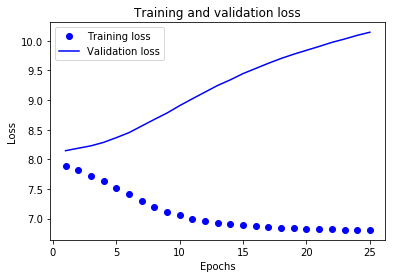

In [33]:
history_dict = history.history
history_dict.keys()
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

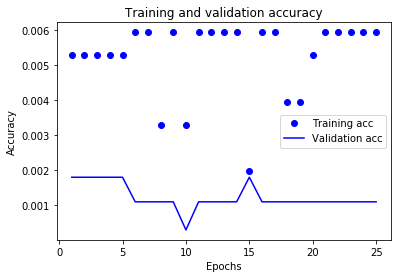

In [34]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
#print(np.argmax(predictions[0])) #why is 85 the max number

In [ ]:
array_inspect(x_test)
array_inspect(y_test)